In [1]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models, optimizers, regularizers
import numpy as np

In [2]:
EPOCHS=50
NUM_CLASSES = 10
BATCH_SIZE = 128

In [3]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

y_train =  tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test =  tf.keras.utils.to_categorical(y_test,NUM_CLASSES)

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
model = models.Sequential()

    #1st blocl
model.add(layers.Conv2D(32, (3,3), padding='same',
    input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

#2nd block
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

#3d block
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.4))

#dense
model.add(layers.Flatten())
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [5]:
model.compile(loss='categorical_crossentropy',
            optimizer='RMSprop',
            metrics=['accuracy'])

In [6]:
#train
batch_size = 64
r=model.fit(x_train, y_train, batch_size=batch_size,
    epochs=EPOCHS, validation_data=(x_test,y_test))

Epoch 1/50
782/782 [==============================] - 29s 15ms/step - loss: 1.7394 - accuracy: 0.4709 - val_loss: 1.3699 - val_accuracy: 0.5625
Epoch 2/50
782/782 [==============================] - 9s 12ms/step - loss: 1.0450 - accuracy: 0.6496 - val_loss: 1.0720 - val_accuracy: 0.6481
Epoch 3/50
782/782 [==============================] - 10s 12ms/step - loss: 0.8366 - accuracy: 0.7155 - val_loss: 0.7273 - val_accuracy: 0.7477
Epoch 4/50
782/782 [==============================] - 10s 12ms/step - loss: 0.7121 - accuracy: 0.7538 - val_loss: 0.6660 - val_accuracy: 0.7729
Epoch 5/50
782/782 [==============================] - 10s 13ms/step - loss: 0.6342 - accuracy: 0.7807 - val_loss: 0.6195 - val_accuracy: 0.7858
Epoch 6/50
782/782 [==============================] - 10s 12ms/step - loss: 0.5736 - accuracy: 0.8019 - val_loss: 0.6142 - val_accuracy: 0.7919
Epoch 7/50
782/782 [==============================] - 10s 13ms/step - loss: 0.5254 - accuracy: 0.8180 - val_loss: 0.5644 - val_accuracy: 

In [7]:
score = model.evaluate(x_test, y_test,
                     batch_size=BATCH_SIZE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

79/79 [==============================] - 1s 5ms/step - loss: 0.5067 - accuracy: 0.8633

Test score: 0.5066640973091125
Test accuracy: 0.8633000254631042


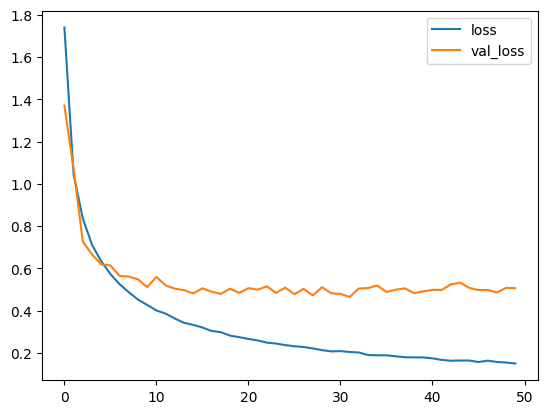

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

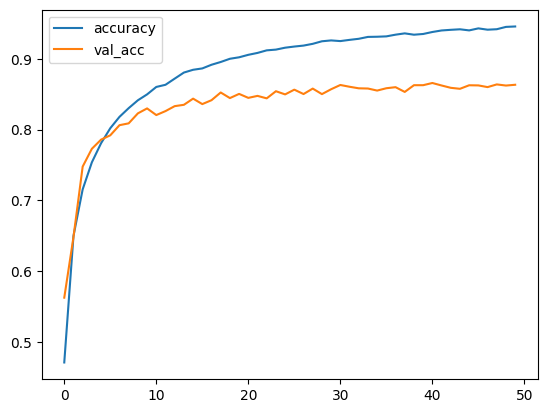

In [9]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()